## Logistic regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [52]:
Data = pd.read_csv(r"D:\Multi-Variant\Logistic regression\weatherAUS.csv")

Data.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,371.000000


In [53]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        141556 non-null  float64
 1   MaxTemp        141871 non-null  float64
 2   Rainfall       140787 non-null  float64
 3   WindGustSpeed  132923 non-null  float64
 4   WindSpeed9am   140845 non-null  float64
 5   WindSpeed3pm   139563 non-null  float64
 6   Humidity9am    140419 non-null  float64
 7   Humidity3pm    138583 non-null  float64
 8   Pressure9am    128179 non-null  float64
 9   Pressure3pm    128212 non-null  float64
 10  Temp9am        141289 non-null  float64
 11  Temp3pm        139467 non-null  float64
 12  RISK_MM        142193 non-null  float64
 13  RainTomorrow   142193 non-null  object 
dtypes: float64(13), object(1)
memory usage: 15.2+ MB


#### Handling Missing data

In [ ]:
# we can use ffill/bfill for forward fill or backward fill
#data.ffill()
#data.bfill()

# 2. fill with mean
# data.fillna(data.mean()["clm1":'clm2])

# 3. Interpolation
# data.interpolation(method =  )

# For now we are using ffill, we will try to look at different methods later to improve the model 

In [54]:
missing = Data.isnull() 
missing.sum()



MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RISK_MM              0
RainTomorrow         0
dtype: int64

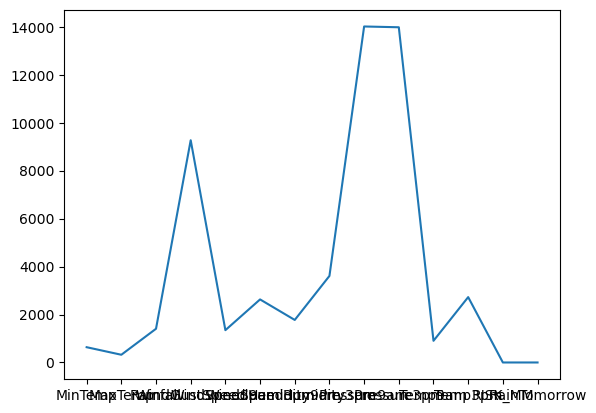

In [55]:
plt.plot(missing.sum())

<AxesSubplot:>

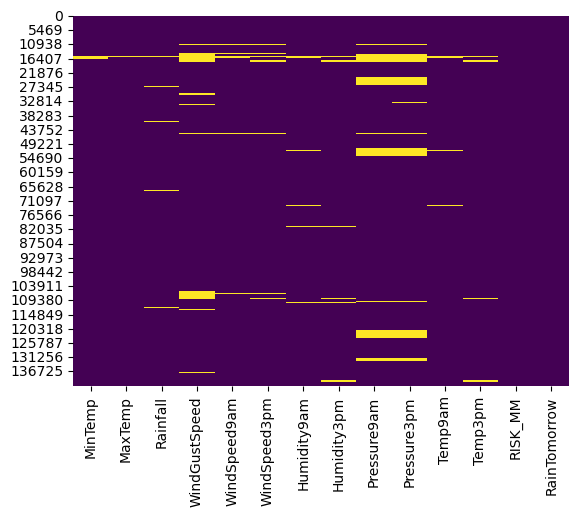

In [56]:
sns.heatmap(missing, cbar = False, cmap='viridis')


In [58]:
Data = Data.ffill()

In [77]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        142193 non-null  float64
 1   MaxTemp        142193 non-null  float64
 2   Rainfall       142193 non-null  float64
 3   WindGustSpeed  142193 non-null  float64
 4   WindSpeed9am   142193 non-null  float64
 5   WindSpeed3pm   142193 non-null  float64
 6   Humidity9am    142193 non-null  float64
 7   Humidity3pm    142193 non-null  float64
 8   Pressure9am    142193 non-null  float64
 9   Pressure3pm    142193 non-null  float64
 10  Temp9am        142193 non-null  float64
 11  Temp3pm        142193 non-null  float64
 12  RISK_MM        142193 non-null  float64
 13  RainTomorrow   142193 non-null  object 
dtypes: float64(13), object(1)
memory usage: 15.2+ MB


In [70]:
# Since we have model created features like rainfall and riskmm so we remove them and we will add a constant for b0

In [80]:
Data.head(5)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1.0,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2,No


In [101]:
X = Data.drop(['Rainfall','RISK_MM','RainTomorrow'], axis=1)
Y = Data['RainTomorrow']

X= X.fillna(method= 'ffill')
X= X.dropna()

In [102]:
X =sm.add_constant(data =X)

In [103]:
X.shape

(142193, 12)

In [104]:
Y.shape

(142193,)

In [118]:
Y = Y.astype('category')

In [185]:
Y = pd.get_dummies(data=Y, drop_first = True).iloc[:,0]
Y.shape

(142193,)

In [169]:
X = X.fillna(method='ffill')
X = X.dropna()                                                 # Or remove the NaNs
logistic_model = sm.GLM(Y, X, family=sm.families.Binomial())
logistic_model = logistic_model.fit()

logistic_model.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    Yes   No. Observations:               142193
Model:                            GLM   Df Residuals:                   142181
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -54537.
Date:                Thu, 19 Oct 2023   Deviance:                   1.0907e+05
Time:                        10:55:12   Pearson chi2:                 1.72e+05
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2571
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            60.0118      1.358     44.207      0.000      57.351      62.672
MinTemp           0.0506      0.004     12.911      0.000       0.043       0.058
MaxTemp          -0.0372      0.006     -6.284      0.000      -0.049      -0.026
WindGustSpeed     0.0499      0.001     59.787      0.000       0.048       0.052
WindSpeed9am     -0.0092      0.001     -7.949      0.000      -0.012      -0.007
WindSpeed3pm     -0.0241      0.001    -21.176      0.000      -0.026      -0.022
Humidity9am       0.0132      0.001     16.703      0.000       0.012       0.015
Humidity3pm       0.0507      0.001     61.075      0.000       0.049       0.052
Pressure9am       0.1016      0.004     23.736      0.000       0.093       0.110
Pressure3pm      -0.1668      0.004    -38.303      0.000      -0.175      -0.158
Temp9am           0.0228      0.006      3.848      0.000       0.011       0.034
Temp3pm          -0.0376      0.006     -5.916      0.000      -0.050      -0.025
=================================================================================
"""

In [181]:
p_pred = logistic_model.predict(X) #intresting notion, Model gives us probability predctions by default we have to inverse the sigmoid function for predicted values

In [182]:
y_pred = np.log(p_pred / (1 - p_pred)) # we know that for prob = 1/(1+exp(-y)), we inverse this to get y_pred from p-pred

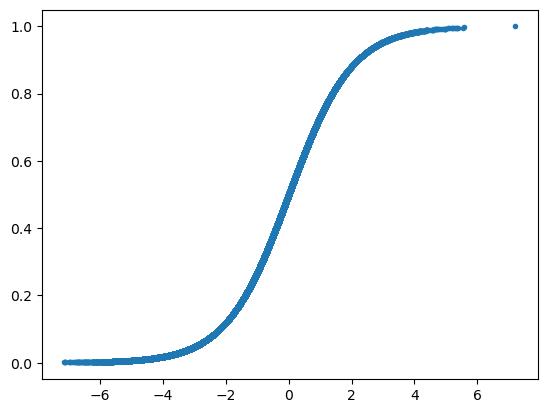

In [184]:
plt.plot(y_pred,p_pred,'.')

#### Mathmatical Approach for y-predM and p_predM

In [190]:
coffes = logistic_model.params.values
coffes

array([ 6.00118156e+01,  5.05872063e-02, -3.72297277e-02,  4.99375263e-02,
       -9.23992501e-03, -2.40742026e-02,  1.31985451e-02,  5.07380767e-02,
        1.01581376e-01, -1.66807879e-01,  2.27760727e-02, -3.75612210e-02])

In [191]:
y_predM = np.dot(X,coffes)

In [192]:
#calculating Probability function

p_predM = 1/(1+np.exp(-y_predM))

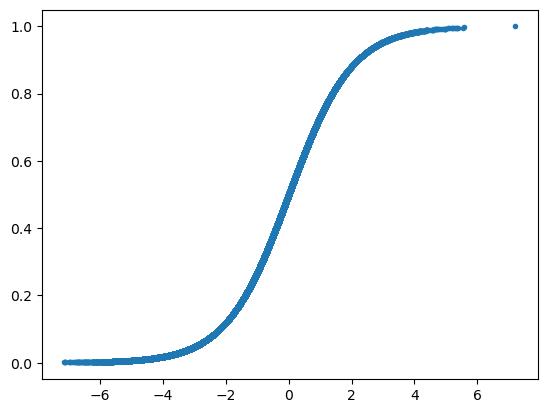

In [193]:
plt.plot(y_predM,p_predM,'.')

In [200]:
sum((abs(p_pred-0.5) <0.2)*1)/len(y_pred)    ## 20% of values are between 0.3 and 0.7. we can say anything above 0.7 is yes, below 0.3 is no, 20% is where we have to improve our model.

0.19941909939307842

In [222]:
## comparing with Maximum Likely-hoodof NUll mode to Model

In [224]:
len(Y)
zeros = abs(Y.sum() - len(Y))
ones = Y.sum()
p = ones/len(Y)
MLH = ones*np.log(p)+zeros*np.log(1-p)

print(MLH)

-75667.90234328121


In [230]:
LF = logistic_model.llf ## for our model
print(LF)

-54537.0334256612


In [233]:
# using chi-square test we'll compare LLF of two model to compare the improvements 


G = 2*(LF - MLH)
G

42261.73783524003

In [ ]:
#using chi-Square table we find Chi-stat as 19.67 as min improvement, we have lot more than that our G = 42261.73 that our improvement. Our model has improved but is it enough with a bised data?

#### ROC curve

In [238]:
# 1. we can see area under ROC curve, To check we should know Type one and Type Two error's
# 2. To find type 1, type 2 error's we should find TPR, FPR and we need confusion matrix and we should find TP,FP, TN, FN

In [241]:
from sklearn import metrics


The Area Under the ROC Curve is :  0.8426343654186126


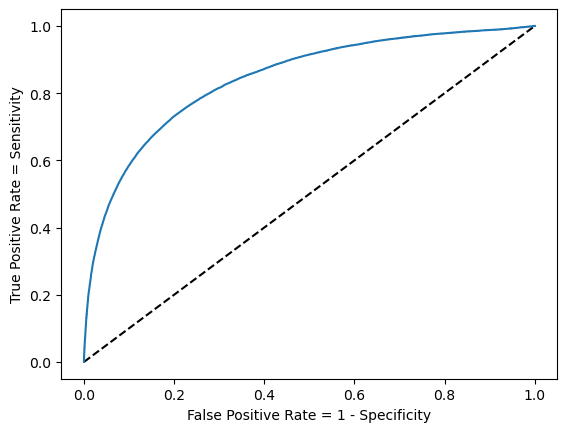

In [264]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(Y,p_pred);
plt.plot([0, 1], [0, 1], 'k--');
plt.plot(fpr, tpr);
plt.xlabel('False Positive Rate = 1 - Specificity')
plt.ylabel('True Positive Rate = Sensitivity')
print('\nThe Area Under the ROC Curve is : ', metrics.auc(fpr,tpr))

In [275]:
print(fpr.sum())
print(tpr.sum())

8250.844872910548
21807.018540013174


In [293]:
print('Accuracy = ', metrics.accuracy_score(true_class,pred_class))
print('Precision = ', metrics.precision_score(true_class,pred_class))
print('Recall = ', metrics.recall_score(true_class,pred_class))
print('F1 = ', metrics.f1_score(true_class,pred_class))

Accuracy =  0.8372634377219694
Precision =  0.7205088082378477
Recall =  0.4477836684757035
F1 =  0.5523138832997988


In [295]:
print(FPR.sum())
print(TPR.sum())

5537.0
14274.0


In [289]:
true_class = Y
pred_class = 1*(p_pred > 0.5)

TP = 1*((true_class == 1) & (pred_class ==1))
FP = 1*((true_class == 0) & (pred_class ==1))
TN = 1*((true_class == 0) & (pred_class ==0))
FN = 1*((true_class == 1) & (pred_class ==0))

In [290]:
TPR = TP/(TP+FN) # typeII error (sensitivity)
TNR = TN/(TN+FP) # specificity  
FPR = TNR # Type II error


In [291]:
threshold = np.sum(1*(Y==1))/len(Y) 

### Comparing with Nural Network Model similar to logistic Regression

In [307]:
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras.regularizers import l1
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import backend as K

In [301]:
data = pd.read_csv(r"D:\Multi-Variant\Logistic regression\weatherAUS.csv")
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RISK_MM,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1.0,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.2,No


In [324]:
X = data.drop(['RainTomorrow','RISK_MM','Rainfall'],axis=1)
X = X.ffill()
Y= data['RainTomorrow']
Y = Y.astype('category')
Y = pd.get_dummies(Y, drop_first = True).iloc[:,0]


In [319]:
x_tr = X
y_tr = pd.DataFrame(Y)

X.shape

(142193, 13)

In [341]:
# Model Arcitecture 

In [366]:
x = layers.Input(shape=(X.shape[1]), name = 'X')


#h= layers.Dense(units= 600,activation ='tanh' ,kernel_regularizer =l1(0.001), name ='h') (x)
#h= layers.Dropout(0.2)(h)
p= layers.Dense(units=1, kernel_regularizer =l1(0.001) , activation ='sigmoid', name='p')(x)       ## adding Kernal_regularization is lasso,rigid regresion (l1/l2)


network = models.Model(inputs=[x],outputs=[p])

In [367]:
network.summary()

Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 X (InputLayer)              [(None, 11)]              0         
                                                                 
 p (Dense)                   (None, 1)                 12        
                                                                 
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [368]:
# model compiling and Training

In [369]:
network.compile(loss='binary_crossentropy', 
                optimizer='Adam', 
                metrics =['acc'])

history = network.fit(X,Y,epochs =10, verbose=2,batch_size=64)

Epoch 1/10
2222/2222 - 2s - loss: 1.2261 - acc: 0.7450 - 2s/epoch - 756us/step
Epoch 2/10
2222/2222 - 1s - loss: 0.4762 - acc: 0.8045 - 1s/epoch - 612us/step
Epoch 3/10
2222/2222 - 1s - loss: 0.4542 - acc: 0.8107 - 1s/epoch - 615us/step
Epoch 4/10
2222/2222 - 1s - loss: 0.4419 - acc: 0.8147 - 1s/epoch - 610us/step
Epoch 5/10
2222/2222 - 1s - loss: 0.4353 - acc: 0.8169 - 1s/epoch - 617us/step
Epoch 6/10
2222/2222 - 1s - loss: 0.4313 - acc: 0.8184 - 1s/epoch - 618us/step
Epoch 7/10
2222/2222 - 1s - loss: 0.4277 - acc: 0.8189 - 1s/epoch - 606us/step
Epoch 8/10
2222/2222 - 1s - loss: 0.4250 - acc: 0.8208 - 1s/epoch - 596us/step
Epoch 9/10
2222/2222 - 1s - loss: 0.4240 - acc: 0.8209 - 1s/epoch - 597us/step
Epoch 10/10
2222/2222 - 1s - loss: 0.4207 - acc: 0.8225 - 1s/epoch - 599us/step


In [370]:
network.layers[1].weights[0]

<tf.Variable 'p/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.01568568],
       [-0.11252309],
       [ 0.06570761],
       [-0.01490198],
       [-0.033214  ],
       [ 0.0150539 ],
       [ 0.06217845],
       [-0.11879496],
       [ 0.11069535],
       [ 0.07807549],
       [ 0.09268504]], dtype=float32)>

##### We see that our model accuracy is not increasing any more even after doing it on Nural Networks LOGIST-Accy= 83.7 , NN-Accy= 82.72